In [3]:
print('oi')
#! pip install tensorflow
#! pip install tensorflow_datasets
#! pip install tensorflow.io
import numpy as np
import pandas as pd   
import os
from pathlib import Path
import glob
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import cv2
import matplotlib.pyplot as plt
import random
print(tf.__version__)
from tensorflow.keras.layers.experimental import preprocessing

print('fim')

        

oi
2.5.0
fim


Number of GPUs : 0
Tensorflow GPU : True
Porcentual0.01
********* lenght *****************
69
K
68
0
K
13
13
passou
*********** vocab set *********
89
Percentage_0.01/vocab_set_14.json
foi
foi1
{'both', 'or', 'than', 'no', 'purple', 'in', 'rubber', 'blocks', 'cube', 'side', 'how', 'How', 'big', 'of', 'shape', 'to', 'What', 'anything', 'size', 'another', 'things', '1', 'objects', 'small', 'any', 'object', 'color', 'other', 'cylinders', 'a', 'material', 'Are', 'and', 'made', 'are', 'gray', 'metal', 'front', 'Is', 'red', 'greater', 'There', 'shiny', 'The', 'fewer', 'behind', 'have', 'metallic', 'tiny', 'matte', 'is', 'on', 'yellow', 'yes', 'either', 'as', 'less', 'number', 'spheres', 'left', '0', 'it', 'large', 'that', 'sphere', 'same', 'does', 'thing', 'what', 'balls', 'brown', 'there', 'right', 'its', 'block', 'cylinder', 'cubes', 'more', 'has', 'ball', '2', 'cyan', 'green', 'visible', 'blue', 'Does', 'many', 'else', 'the'}
passou2
*********** vocab set *********
89
Model: "model_1"
___

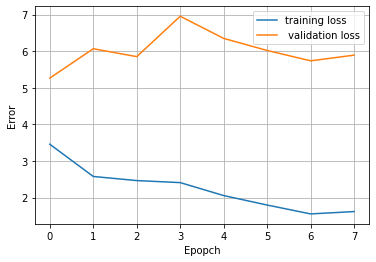

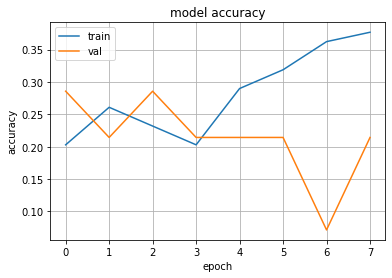

In [6]:
#Check GPU is available for training or not Or whether the tensorflow version can utilize gpu 
physical_devices = tf.config.list_physical_devices('GPU') 
print("Number of GPUs :", len(physical_devices)) 
print("Tensorflow GPU :",tf.test.is_built_with_cuda())
if len(physical_devices)>0:
    device="/GPU:0"
else:
    device="/CPU:0"

listlenghData = [0.01]
for percentageData in listlenghData:
        
        print('Porcentual' + str(percentageData ))
       #train_dataframe and val_dataframe stores the path to the images and respective questions and answers
        lenghtData = 0
        posTrain = []
        posQues = []
        trainList=[]
        k=0
        with open('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/questions/CLEVR_train_questions.json') as f:
            data = json.load(f)
            qtdData = len(data['questions'])
            lenghtDataTrain = int(qtdData * (percentageData/100))
            print('********* lenght *****************')
            print(lenghtDataTrain)
            if lenghtDataTrain == 0 : 
                lenghtDataTrain = len(data['questions'])
            
            pos =0 
        
            for k in range(lenghtDataTrain):
                # if (lenghtData != len(data['questions'])): 
                #    while  (pos in posTrain):
                #        pos= random.randrange(1, qtdData-1, 3)
                #else :
                #    pos = k 
                posTrain.append(k)
                i = data['questions'][k]
                temp=[]
                for path in glob.glob('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/images/train/'+i['image_filename']): 
                    temp.append(path)
                temp.append(i['question'])
                temp.append(i['answer'])
                trainList.append(temp)
        f.close()
        labels=['Path','Question','Answer']
        train_dataframe = pd.DataFrame.from_records(trainList, columns=labels)#training Dataframe 
        del(data)
        del(trainList)
        print('K')
        print(k)
        print(pos)
        BATCH_SIZE=8
        k=0
        pos=0
        valList=[]
        lenghtData = 0 
        with open('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/questions/CLEVR_val_questions.json') as f:
            data = json.load(f)
            qtdData = len(data['questions'])
            lenghtData = int(qtdData * (percentageData/100))
            
            if lenghtData == 0 : 
                lenghtData = len(data['questions'])
                
            for k in range(lenghtData):
                #if (lenghtData != len(data['questions'])): 
                #    while  (pos in posQues):
                #        pos= random.randrange(1, qtdData-1, 3)
                #else :
                pos = k   
                posQues.append(pos)
                i = data['questions'][pos]
                temp=[]
                for path in glob.glob('/home/jupyter/input/clevr-dataset/CLEVR_v1.0/images/val/'+i['image_filename']): 
                    temp.append(path)
                temp.append(i['question'])
                temp.append(i['answer'])
                valList.append(temp)

        print('K')
        print(k)
        print(pos)
        f.close()
        val_dataframe = pd.DataFrame.from_records(valList, columns=labels)#validation Dataframe
        del(data)
        del(valList)
        val_dataframe.head()

        vocab_set=set()#set object used to store the vocabulary
        #
        tokenizer = tfds.features.text.Tokenizer()
        print('passou')

        for i in val_dataframe['Question']:
            vocab_set.update(tokenizer.tokenize(i))
        for i in train_dataframe['Question']:
            vocab_set.update(tokenizer.tokenize(i))
        for i in val_dataframe['Answer']:
            vocab_set.update(tokenizer.tokenize(i))
        for i in train_dataframe['Answer']:
            vocab_set.update(tokenizer.tokenize(i))
        #
        #Creating an Encoder and a Function to preprocess the text data during the training and inference    
        #deprecated
        encoder= tfds.features.text.TokenTextEncoder(vocab_set)
        index=1
        print( '*********** vocab set *********')
        print(len(vocab_set))
        IMG_SIZE=(200,200)
        print('Percentage_'+ str(percentageData) + '/'+ 'vocab_set_' +str(lenghtData) + '.json')
        os.makedirs(os.path.dirname('Percentage_'+ str(percentageData) + '/'+ 'vocab_set_' +str(lenghtData) + '.json'), exist_ok=True)
        print ('foi')   
        with open('Percentage_'+ str(percentageData) + '/'+ 'vocab_set_' +str(lenghtData) + '.json', 'w', encoding='utf-8') as f:
            json.dump(list(vocab_set), f, ensure_ascii=False, indent=4)
        print('foi1')
        print(vocab_set)
        #Function that uses the encoder created to encode the input question and answer string
        def encode_fn(text):
            return np.array(encoder.encode(text.numpy()))
                  
        with open('Percentage_'+ str(percentageData) + '/train_datalenght'+str(lenghtDataTrain) + '.json', 'w', encoding='utf-8') as f:
            json.dump(posTrain, f, ensure_ascii=False, indent=4)
        with open('Percentage_'+ str(percentageData) + '/ques_datalenght'+str(lenghtData) + '.json', 'w', encoding='utf-8') as f:
            json.dump(posQues, f, ensure_ascii=False, indent=4) 
        print('passou2')
        #Function to load and decode the image from the file paths in the dataframe and use the encoder function
        def preprocess(ip,ans):
            img,ques=ip#ip is a list containing image paths and questions
            img=tf.io.read_file(img)
            img=tf.image.decode_jpeg(img,channels=3)
            # quantos canais de cores tem 
            img=tf.image.resize(img,IMG_SIZE)
            img=tf.math.divide(img, 255)# 
            #The question string is converted to encoded list with fixed size of 50 with padding with 0 value
            ques=tf.py_function(encode_fn,inp=[ques],Tout=tf.int32)
            paddings = [[0, 50-tf.shape(ques)[0]]]
            ques = tf.pad(ques, paddings, 'CONSTANT', constant_values=0)
            ques.set_shape([50])#Explicit shape must be defined in order to create the Input pipeline

            #The Answer is also encoded 
            ans=tf.py_function(encode_fn,inp=[ans],Tout=tf.int32)
            ans.set_shape([1])

            return (img,ques),ans

        def create_pipeline(dataframe):
            raw_df=tf.data.Dataset.from_tensor_slices(((dataframe['Path'],dataframe['Question']),dataframe['Answer']))
            df=raw_df.map(preprocess)#Preprocessing function is applied to the dataset
            df=df.batch(BATCH_SIZE)#The dataset is batched
            return df

        #The training and validation Dataset objects are created
        train_dataset=create_pipeline(train_dataframe)
        validation_dataset=create_pipeline(val_dataframe)

        #Creating the CNN model for image processing


        CNN_Input=tf.keras.layers.Input(shape=(200,200,3),name='image_input')

        mobilenetv2=tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(200,200,3), alpha=1.0, include_top=False,
                                                              weights='imagenet', input_tensor=CNN_Input)

        CNN_model=tf.keras.models.Sequential()
        CNN_model.add(CNN_Input)
        CNN_model.add(mobilenetv2)
        CNN_model.add(tf.keras.layers.GlobalAveragePooling2D())


        print( '*********** vocab set *********')
        print(len(vocab_set))
        #Creating the RNN model for text processing
        RNN_model=tf.keras.models.Sequential()

        RNN_Input=tf.keras.layers.Input(shape=(50),name='text_input')
        RNN_model.add(RNN_Input)
        RNN_model.add(tf.keras.layers.Embedding (len(vocab_set)+1,256))
        RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,stateful=False,return_sequences=True,recurrent_initializer='glorot_uniform')))
        RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,stateful=False,return_sequences=True,recurrent_initializer='glorot_uniform')))
        RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512,stateful=False,return_sequences=False,recurrent_initializer='glorot_uniform')))


        concat=tf.keras.layers.concatenate([CNN_model.output,RNN_model.output])
        dense_out=tf.keras.layers.Dense(len(vocab_set)+1,activation='softmax',name='output')(concat)

        model = tf.keras.Model(inputs=[CNN_Input,RNN_Input],
                            outputs=dense_out)
        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
        model.summary()

        def scheduler(epoch):
          if epoch < 1:
            return 0.001
          else:
            return 0.001 * tf.math.exp(0.1 * (1 - epoch))
        
        filepath='Percentage_'+ str(percentageData) + '/weights-improvement-{epoch:02d}-{val_loss:.2f}.ckpt'
        
        LRS = tf.keras.callbacks.LearningRateScheduler(scheduler)
        csv_callback=tf.keras.callbacks.CSVLogger( "Training Parameters.csv", separator=',', append=False )
      
        checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1,save_weights_only=True)
        callbacks_list = [checkpoint]

        

        with tf.device(device):
            history = model.fit(train_dataset,
                validation_data=validation_dataset,
                callbacks=[csv_callback,LRS,checkpoint],
                epochs=8)

        train_dataframe.iloc[index]['Path']
        print("grafics")
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        history.history
        hist.tail()

        def plot_loss(history):
          plt.plot(history.history['loss'], label='training loss')
          plt.plot(history.history['val_loss'], label=' validation loss')
          #plt.ylim([0, 10])
          plt.xlabel('Epopch')
          plt.ylabel('Error')
          plt.legend()
          plt.grid(True)
          plt.savefig( 'Percentage_'+ str(percentageData) + '/error_datalenght'+str(lenghtData) + '.png')
          plt.show()

        def plot_acc(history):  
          plt.plot(history.history['sparse_categorical_accuracy'])
          plt.plot(history.history['val_sparse_categorical_accuracy'])
          plt.title('model accuracy')
          plt.ylabel('accuracy')
          plt.xlabel('epoch')
          plt.legend(['train', 'val'], loc='upper left')
          plt.grid(True)
          plt.savefig('Percentage_'+ str(percentageData) + '/accuracy_datalenght'+str(lenghtData) + '.png')
          plt.show()
        plot_loss(history)
        plot_acc(history)


In [7]:
contadorCerto =0
contadorErro =0 

for contador in range(69) :
   
    im=cv2.imread(train_dataframe.iloc[contador]['Path'])
    im=cv2.resize(im,(200,200))
    q=train_dataframe.iloc[contador]['Question'] 
    q=encoder.encode(q)
    paddings = [[0, 50-tf.shape(q)[0]]]
    q=tf.pad(q, paddings, 'CONSTANT', constant_values=0)
    q=np.array(q)
    im.resize(1,200,200,3)
    q.resize(1,50)
    ans=model.predict([im,q]) 
    decodAns = encoder.decode([np.argmax(ans)])
    if train_dataframe.iloc[contador]['Answer'] != decodAns :
        contadorErro = contadorErro +1
    else:     
        contadorCerto = contadorCerto +1
      
print(contadorCerto)
print(contadorErro)
    

16
53
